In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_csv('C:\\Users\\Honor\\Desktop\\PMI\\DZ\\1.csv', sep=';')
array = dataframe.values
V = array[:,0]
V = V.astype(np.float64)
I_V = array[:,1]
I_V = I_V.astype(np.float64)

dataframe2 = pd.read_csv('C:\\Users\\Honor\\Desktop\\PMI\\DZ\\6.csv', sep=';')
array2 = dataframe2.values
V2 = array2[:,0]
V2 = V2.astype(np.float64)
I_V2 = array2[:,1]
I_V2 = I_V2.astype(np.float64)

In [2]:
I = I_V/9100
I2 = I_V2/9100

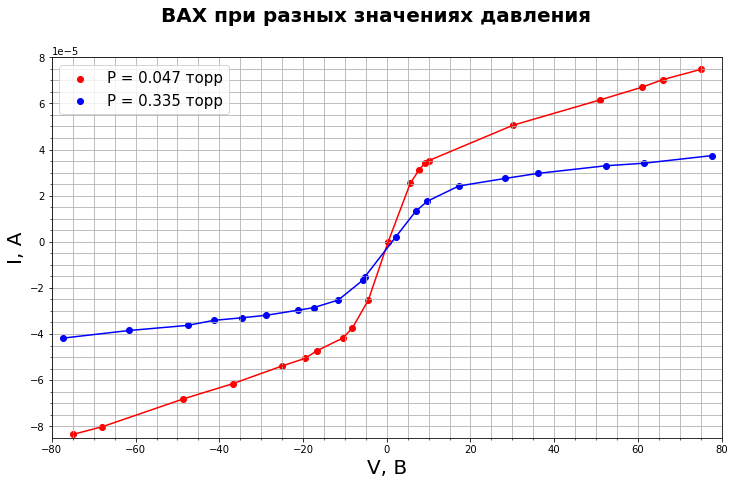

In [3]:
fig = plt.figure(figsize = (12, 7))
ax = plt.gca()
plt.grid(which ='major')
ax.grid(which ='minor')
plt.xlabel('V, B', fontsize=20)
plt.ylabel('I, A', fontsize=20)
plt.minorticks_on()
ax.set_xlim(-80, 80)
ax.set_ylim(-8.5/100000, 8/100000)
fig.suptitle('ВАХ при разных значениях давления', fontweight ="bold", fontsize = '20')

plt.scatter(V, I, color = 'red', label = 'P = 0.047 торр')
plt.scatter(V2, I2, color = 'blue', label = 'P = 0.335 торр')
plt.plot(np.sort(V), np.sort(I), color = 'red')
plt.plot(np.sort(V2), np.sort(I2), color = 'blue')

plt.legend(fontsize = '15')

In [4]:
b_coef = []
a_coef = []

b = 0.12436950710649843
[2.87619282e-06 1.79917096e-02 5.38344888e-08]


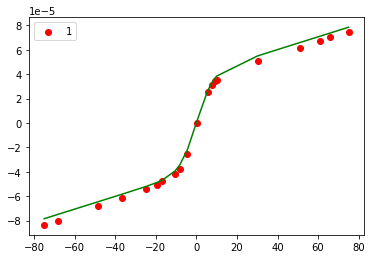

In [5]:
from scipy.optimize import curve_fit

def f(x, a, b, c):
    return a*np.tanh(b*x)+c*x

popt, _ = curve_fit(f, V, I)
fit_y = np.array([f(x, popt[0], popt[1], popt[2]) for x in V])

plt.scatter(V, I, color = 'red', label = '1')
plt.plot(np.sort(V), np.sort(fit_y), color = 'green')
plt.legend()
print('b =', popt[1])
b_coef.append(popt[1])
a_coef.append(popt[0])
perr = np.sqrt(np.diag(_))
print(perr)

b = 0.09631766916060436
[2.09055036e-06 1.46338775e-02 4.08524568e-08]


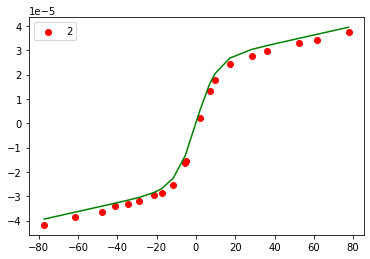

In [6]:
popt, _ = curve_fit(f, V2, I2)
fit_y = np.array([f(x, popt[0], popt[1], popt[2]) for x in V2])

plt.scatter(V2, I2, color = 'red', label = '2')
plt.plot(np.sort(V2), np.sort(fit_y), color = 'green')
plt.legend()
print('b =', popt[1])
b_coef.append(popt[1])
a_coef.append(popt[0])
perr = np.sqrt(np.diag(_))
print(perr)

In [7]:
for i in range(len(b_coef)):
    print('b =', round(b_coef[i], 3))
print()
for i in range(len(a_coef)):
    print('a =', a_coef[i]*1000000, 'mcA')

b = 0.124
b = 0.096

a = 39.20350085300471 mcA
a = 25.41876535055648 mcA
